In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
#import scipy stats module
from scipy.stats import chi2, describe


In [4]:
import sys
sys.path.append('../')
from src import AFDB_tools, treescore , foldseek2tree
import pandas as pd
import numpy as np

In [3]:
foldseek2tree.

        0   1   2   3   4   5   6   7   8   9   10     11
0  1oaiA00   1  10   8  10   1   1   1   1   1  59    1.0
1  1go5A00   1  10   8  10   1   1   1   1   2  69  999.0
2  3frhA01   1  10   8  10   2   1   1   1   1  58    1.2
3  3friA01   1  10   8  10   2   1   1   1   2  54    1.8
4  3b89A01   1  10   8  10   2   1   1   2   1  54    2.6
           0   1    2                                                  3
0  1.10.8.10  73  318       DNA helicase RuvA subunit, C-terminal domain
1  1.10.8.20   5   24  N-terminal domain of phosphatidylinositol tran...
2  1.10.8.40   2   15                             Albumin-binding domain
3  1.10.8.50  14  543                                                NaN
4  1.10.8.60  60  745                                                NaN


In [4]:
#change the type to string
domain_df = domain_df.astype(str)
domain_df['superfam'] = domain_df[[1,2,3,4]].apply(lambda x : '.'.join(x), axis = 1) 
print(domain_df)

              0  1   2    3   4  5  6  7  8  9  10     11     superfam
0       1oaiA00  1  10    8  10  1  1  1  1  1  59    1.0    1.10.8.10
1       1go5A00  1  10    8  10  1  1  1  1  2  69  999.0    1.10.8.10
2       3frhA01  1  10    8  10  2  1  1  1  1  58    1.2    1.10.8.10
3       3friA01  1  10    8  10  2  1  1  1  2  54    1.8    1.10.8.10
4       3b89A01  1  10    8  10  2  1  1  2  1  54    2.6    1.10.8.10
...         ... ..  ..  ...  .. .. .. .. .. ..  ..    ...          ...
500233  4aybQ00  6  20  450  10  1  1  1  2  1  50    3.2  6.20.450.10
500234  3hkzY00  6  20  450  10  1  1  2  1  1  45    3.4  6.20.450.10
500235  3hkzZ00  6  20  450  10  1  1  2  1  2  45    3.4  6.20.450.10
500236  3zbeA00  6  20  450  20  1  1  1  1  1  71  999.0  6.20.450.20
500237  3duzA04  6  20  460  10  1  1  1  1  1  29   2.95  6.20.460.10

[500238 rows x 13 columns]


                0   1    2                                                  3
0       1.10.8.10  73  318       DNA helicase RuvA subunit, C-terminal domain
1       1.10.8.20   5   24  N-terminal domain of phosphatidylinositol tran...
2       1.10.8.40   2   15                             Albumin-binding domain
3       1.10.8.50  14  543                                                NaN
4       1.10.8.60  60  745                                                NaN
...           ...  ..  ...                                                ...
6626  6.20.430.10   1   14                                                NaN
6627  6.20.440.10   1   10                                                NaN
6628  6.20.450.10   1    4                                                NaN
6629  6.20.450.20   1    1                                                NaN
6630  6.20.460.10   1    1                                                NaN

[6631 rows x 4 columns]


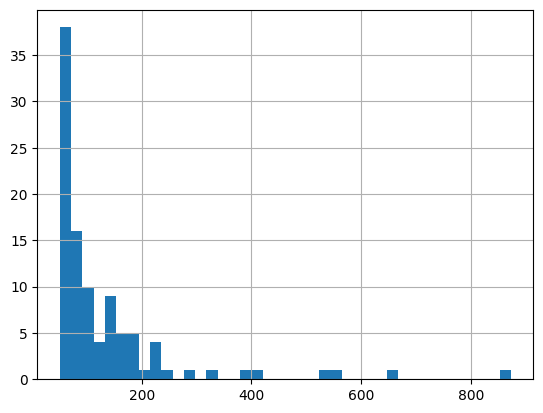

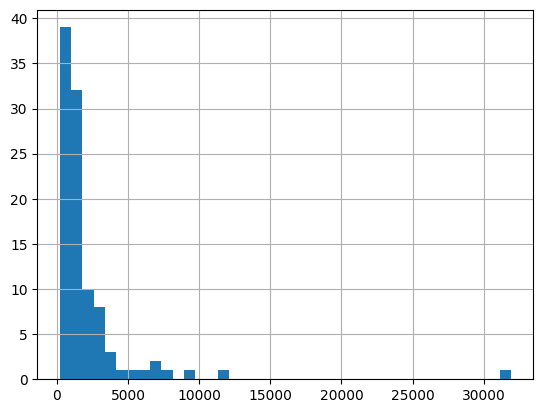

              0  1   2     3   4    5  6  7  8  9  10     11      superfam
0       1oaiA00  1  10     8  10    1  1  1  1  1  59    1.0     1.10.8.10
1       1go5A00  1  10     8  10    1  1  1  1  2  69  999.0     1.10.8.10
2       3frhA01  1  10     8  10    2  1  1  1  1  58    1.2     1.10.8.10
3       3friA01  1  10     8  10    2  1  1  1  2  54    1.8     1.10.8.10
4       3b89A01  1  10     8  10    2  1  1  2  1  54    2.6     1.10.8.10
...         ... ..  ..   ...  ..  ... .. .. .. ..  ..    ...           ...
484682  3wgcA02  3  90  1150  10  194  1  1  1  4  76    2.5  3.90.1150.10
484683  3wgbC02  3  90  1150  10  194  1  1  2  1  83    2.6  3.90.1150.10
484684  3wgbA02  3  90  1150  10  194  1  1  2  2  82    2.6  3.90.1150.10
484685  3wgbD02  3  90  1150  10  194  1  1  2  3  82    2.6  3.90.1150.10
484686  3wgbB02  3  90  1150  10  194  1  1  2  4  77    2.6  3.90.1150.10

[217612 rows x 13 columns]


In [5]:
import matplotlib.pyplot as plt
print( superfam_df)

superfam_df = superfam_df[superfam_df[1] > 50]
superfam_df[1].hist(bins = 40)
plt.show()
superfam_df[2].hist(bins = 40)
plt.show()

domain_df = domain_df[domain_df['superfam'].isin(superfam_df[0])]
print(domain_df)

In [6]:

siftsdf = pd.read_csv('./CATH_data/pdb_chain_cath_uniprot.csv', header=1 )
print(siftsdf)

         PDB CHAIN SP_PRIMARY  CATH_ID
0       101m     A     P02185  101mA00
1       102l     A     P00720  102lA00
2       102m     A     P02185  102mA00
3       103l     A     P00720  103lA00
4       103m     A     P02185  103mA00
...      ...   ...        ...      ...
451315  9xia     A     P24300  9xiaA00
451316  9xim     A     P12851  9ximA00
451317  9xim     B     P12851  9ximB00
451318  9xim     C     P12851  9ximC00
451319  9xim     D     P12851  9ximD00

[451320 rows x 4 columns]


In [7]:
#map CATH_ID of siftsdf to domain_df first column with merge
siftsdf = pd.merge(siftsdf, domain_df, left_on='CATH_ID', right_on=0 , how='right')
print(siftsdf.dropna())




         PDB CHAIN SP_PRIMARY  CATH_ID        0  1   2     3   4    5  6  7  \
0       1oai     A     Q9UBU9  1oaiA00  1oaiA00  1  10     8  10    1  1  1   
1       1go5     A     Q9UBU9  1go5A00  1go5A00  1  10     8  10    1  1  1   
2       3frh     A     Q763K9  3frhA01  3frhA01  1  10     8  10    2  1  1   
3       3fri     A     Q763K9  3friA01  3friA01  1  10     8  10    2  1  1   
4       3b89     A     Q763K9  3b89A01  3b89A01  1  10     8  10    2  1  1   
...      ...   ...        ...      ...      ... ..  ..   ...  ..  ... .. ..   
219410  3wgc     A     O07051  3wgcA02  3wgcA02  3  90  1150  10  194  1  1   
219411  3wgb     C     O07051  3wgbC02  3wgbC02  3  90  1150  10  194  1  1   
219412  3wgb     A     O07051  3wgbA02  3wgbA02  3  90  1150  10  194  1  1   
219413  3wgb     D     O07051  3wgbD02  3wgbD02  3  90  1150  10  194  1  1   
219414  3wgb     B     O07051  3wgbB02  3wgbB02  3  90  1150  10  194  1  1   

        8  9  10     11      superfam  
0       1  

In [8]:
print(siftsdf.superfam.unique(),len(siftsdf.superfam.unique()))

['1.10.8.10' '1.10.8.60' '1.10.10.10' '1.10.10.60' '1.10.150.20'
 '1.10.150.50' '1.10.238.10' '1.10.260.40' '1.10.357.10' '1.10.490.10'
 '1.10.510.10' '1.10.533.10' '1.10.600.10' '1.10.630.10' '1.10.760.10'
 '1.20.5.170' '1.20.1050.10' '1.20.1260.10' '1.25.10.10' '1.25.40.10'
 '1.25.40.20' '2.10.25.10' '2.10.70.10' '2.30.29.30' '2.30.30.40'
 '2.30.30.100' '2.30.30.140' '2.30.42.10' '2.30.110.10' '2.40.10.10'
 '2.40.30.10' '2.40.50.40' '2.40.50.100' '2.40.50.140' '2.40.128.20'
 '2.60.40.10' '2.60.40.420' '2.60.40.1180' '2.60.120.10' '2.60.120.20'
 '2.60.120.200' '2.60.120.260' '2.80.10.50' '2.130.10.10' '3.10.20.90'
 '3.10.100.10' '3.10.129.10' '3.10.180.10' '3.10.450.50' '3.20.20.70'
 '3.20.20.80' '3.20.20.120' '3.20.20.140' '3.30.40.10' '3.30.70.100'
 '3.30.70.270' '3.30.70.330' '3.30.160.60' '3.30.200.20' '3.30.360.10'
 '3.30.390.10' '3.30.420.10' '3.30.420.40' '3.30.450.20' '3.30.450.40'
 '3.30.470.20' '3.30.505.10' '3.30.530.20' '3.30.930.10' '3.40.30.10'
 '3.40.47.10' '3.40.50.150

In [10]:
from src import AFDB_tools
import os
datapath = './CATH_data/'
nprots = 250
#iterate over all superfamilies and create a tree for each
for superfam in siftsdf.superfam.unique():
    #create a tree for each superfam
    #sample 1000 proteins from the superfam
    prots = siftsdf[siftsdf.superfam == superfam].sample(min(nprots, len(siftsdf[siftsdf.superfam == superfam]))).dropna()
    print(prots)

    #output the sequence dataset to a file
    prots.to_csv(datapath+superfam+'/sequence_dataset.csv')
    #create a folder for the superfam if it does not exist

    if not os.path.exists(datapath+superfam):
        os.mkdir(datapath+superfam)
    
    #output the uniport ids to a file
    with open(datapath+superfam+'/identifiers.txt', 'w') as f:
        f.write('\n'.join( list(prots['SP_PRIMARY'])))
    #create a folder for the structures if it does not exist
    if not os.path.exists(datapath+superfam+'/structs'):
        os.mkdir(datapath+superfam+'/structs')
    #grab the structures from AFDB
    missing = [AFDB_tools.grab_struct(i, datapath+superfam+'/structs/') for i in prots['SP_PRIMARY']]
    missing = [i for i in missing if i]
    print('missing in afdb:',missing)

        

      PDB CHAIN SP_PRIMARY  CATH_ID        0  1   2  3   4   5  6  7  8   9  \
164  3glg     E     P28631  3glgE02  3glgE02  1  10  8  10  28  1  1  1   3   
45   2bwe     E     P48510  2bweE00  2bweE00  1  10  8  10  10  1  1  2  16   
94   2h5x     D     P9WGW3  2h5xD03  2h5xD03  1  10  8  10  19  1  1  1   3   
189  1tr8     A     P0C0K9  1tr8A02  1tr8A02  1  10  8  10  32  1  1  1   1   
306  1wj7     A     Q80X50  1wj7A01  1wj7A01  1  10  8  10  63  1  1  1   1   
..    ...   ...        ...      ...      ... ..  .. ..  ..  .. .. .. ..  ..   
309  2mro     B     P40087  2mroB00  2mroB00  1  10  8  10  65  1  1  1   2   
305  2dhy     A     Q9NWM3  2dhyA00  2dhyA00  1  10  8  10  62  2  1  1   1   
228  1do0     A     P0A6H5  1do0A02  1do0A02  1  10  8  10  41  1  1  1   2   
267  1q02     A     Q13501  1q02A00  1q02A00  1  10  8  10  45  1  1  1   1   
235  1e94     F     P0A6H5  1e94F02  1e94F02  1  10  8  10  41  1  1  2   2   

     10     11   superfam  
164  40   3.25  1.10.8.

OSError: Cannot save file into a non-existent directory: '../CATH_data/1.10.8.10'

In [ ]:
#load the pairwise distances predicted by foldseek
def load_distmat( pairdf ):
    ids = list(set(pairdf['query']).union(set(pairdf['target'])))
    cols = 'fident,alnlen,mismatch,evalue,bits,lddt,lddtfull,alntmscore'.split()
    #create a tensor of the different features for each pair
    features = torch.zeros((len(ids), len(ids), len(cols)+2+2+6))
    position = {ids[i]:i for i in range(len(ids))}
    #iterate over all pairs
    for idx,r in pairdf.iterrows():
        #get the features of the pair
        i = position[r[0]]
        j = position[r[1]]
        if i<= j:

            features[i, j] = torch.tensor(r[cols])
            features[i, j] = torch.tensor(r[cols])
    return ids,features

In [4]:
#use pytorch-metriclearning to calculate the pairwise distances on the input tensor
from torch import nn

ModuleNotFoundError: No module named 'OrderedDict'

In [3]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
def get_model():
    return nn.Sequential(
        nn.Linear(20, 10),
        nn.ReLU(),
        nn.Linear(10, 5),
        nn.ReLU(),
        nn.Linear(5, 2),
    )


#after prediction of pairwise distances for one tree, calculate the tree error
class TreeLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()
    def forward(self, t ):
        return 1-(treescore.tree_score(t)/(len(t.nodes()) * len(taxaset) ))
    

#training loop over the tensors of pairwise distances
def train_loop(model, train_loader, loss_fn, optimizer, device = device):
        size = len(train_loader.dataset)
        model = get_model()
        model = model.to(device)

        #use tqdm progrss bar
        with tqdm(total=size) as t:

                for batch, (X, y) in enumerate(train_loader):
                        #apply the model elementwise to the tensor
                        for i in range(X.shape[0]):
                                for j in range(X.shape[1]):
                                        Pred[i,j] = model(X[i,j,:])
                        #make tree
                        t = foldseek2tree.make_tree(Pred, ids)
                        #calculate tree error
                        loss = TreeLoss(t, seqdf )
                        # Backpropagation
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()
                        tqdm.write(f"loss: {loss.item():>7f}  [{batch * len(X):>5d}/{size:>5d}]")
                



NameError: name 'OrderedDict' is not defined

In [ ]:
download = True
for t in glob.glob('./examples/sw'):
    print(t)
    try:
        os.mkdir(t+'structs/')
    except:
        print('already exists')
    outfolder = t+'structs/'
    
    if download == True:
        if 'pruned' not in t :
            print(t)
            tre = toytree.tree(t )
            notfound = [ AFDB_tools.grab_struct(uniID, outfolder)  for uniID in tre.get_tip_labels() ]
            notfound = [ i for i in notfound if i]
            with open(t+'unmapped.txt', 'w') as simout:
                simout.write(json.dumps(notfound))

In [ ]:
#prune not found
import ete3
for t in glob.glob('./ST_Update/*.nhx'):
    if 'pruned' not in t:
        with open(t+'unmapped.txt') as missing:
            missingIDs = json.loads(missing.read())
        print(missingIDs)
        print(t)
        tree = ete3.Tree(t)
        print(len(tree))
        keep = [ n for n in tree.traverse() if n.name not in missingIDs]
        tree.prune(keep, preserve_branch_length=True)
        print(len(tree))
        print(t+'pruned.nhx')
        with open(t+'pruned.nhx' , 'w' )as treeout:
            treeout.write(tree.write(format=1))

In [ ]:

for folder in glob.glob('./ST_Update/*/'):
    print(folder)
    input_structs = folder
    dbpath = foldseek2tree.runFoldseekdb(input_structs, folder)
    res = foldseek2tree.runFoldseek_allvall(dbpath , folder)

In [ ]:
for folder in glob.glob('./examples/*/'):
    print(folder)
    input_structs = folder+'structs/'
    dbpath = foldseek2tree.runFoldseekdb(input_structs, folder)
    res = foldseek2tree.runFoldseek_allvall(dbpath , folder)

In [2]:
def standard_treedraw( tre, sizes= None , colors= None ,fixed_order=None, fixed_position=None , ts = None,  save_file = False  , tiplabels = None):
    if tiplabels is None:
        tiplabels = tre.get_tip_labels()
    canvas, axes, mark = tre.draw(  
        ts = ts,
        node_sizes=sizes,
        node_colors=colors,
        tip_labels_align=True,
        scalebar=True,
        fixed_order=fixed_order, 
        fixed_position=fixed_position,
        tip_labels=tiplabels,
        tip_labels_style={
            "fill": "#262626",
            "font-size": "9px"}
    )
    if save_file:
        toyplot.svg.render(canvas, save_file)

In [3]:
#get trees
swisstreepath = './ST_Update/*nhxpruned.nhx'
swiss_trees = glob.glob(swisstreepath)
print(swiss_trees)
swiss_toytrees = {}

discretized_levels = 10
maxnodesize = 10
for t in swiss_trees:
    print(t)
    treecheck = True
    try:
        tre = toytree.tree(t , format =0 )
    except:
        print('tree err' , t)
        treecheck = False
    if treecheck == True:
        swiss_toytrees[t] = { 'tree' : tre }
        print(tre)
        swiss_toytrees[t]['labels'] = tre.get_tip_labels()
        swiss_toytrees[t]['coords'] = tre.get_tip_coordinates()
        swiss_toytrees[t]['path'] = t
        labels = swiss_toytrees[t]['labels']
        unidf = AFDB_tools.grab_entries(labels)
        lineages = treescore.make_lineages(unidf)
        discretized_levels = 10
        maxnodesize = 15
        taxlabels = dict(zip(unidf['query'] ,unidf.Organism) )
        #species_mapper = 
        tipnames = tre.get_tip_labels()
        taxnames = [ i+ ' '+taxlabels[i] if i in taxlabels else i for i in tipnames]
        red = colour.Color('blue')
        blue = colour.Color('red')
        tre = treescore.label_leaves(tre,lineages)
        color_vals = list(red.range_to(blue, discretized_levels+1))
        overlap = treescore.getTaxOverlap(tre.treenode)
        treevals = [ node.score for node in tre.treenode.traverse()]
        print(treevals)
        print('finalscore' , tre.treenode.score)
        swiss_toytrees[t]['score'] = tre.treenode.score
        treevals = tre.get_node_values('size', True, True)
        maxval = np.amax(treevals)
        minval =0
        bins = [minval + i*(maxval-minval)/discretized_levels for i in range(discretized_levels+1)]
        inds = np.digitize(treevals, bins)
        colors = [ color_vals[i-1].hex_l for i in list(inds)]
        sizes = [ (i / discretized_levels) * maxnodesize for i in list(inds) ]
        standard_treedraw(tre , sizes= sizes , colors=colors , tiplabels = taxnames , save_file = t + '.svg')
        standard_treedraw(tre  , sizes= sizes , colors=colors , tiplabels = taxnames )        

[]


In [4]:
import subprocess, shlex
def madroot(t):
    args = '/work/FAC/FBM/DBC/cdessim2/default/dmoi/software/mad/mad ' + t
    subprocess.run(shlex.split(args))
    return t+ '.rooted'

In [5]:

for folder in glob.glob('./examples/*/') :
    print(folder)
    treenumber = folder.split('/')[1]
    tmres = folder +'aln_score.tsv'
    res = pd.read_table(tmres, header = None ,delim_whitespace=True)
    res[0] = res[0].map(lambda x :x.replace('.pdb', ''))
    res[1] = res[1].map(lambda x :x.replace('.pdb', ''))
    self_dists = res[res[0] == res[1]]
    self_distmap = dict(zip(self_dists[0] , self_dists[2] ) )
    ids = list( set(list(res[0].unique()) + list(res[1].unique())))
    pos = { protid : i for i,protid in enumerate(ids)}
    print(res)
    distmat = np.zeros((len(pos), len(pos)))
    kernel_distmat = np.zeros((len(pos), len(pos)))
    for idx,row in res.iterrows():
        distmat[pos[row[0]] , pos[row[1]]]= row[3]
        kernel_distmat[pos[row[0]] , pos[row[1]]] = foldseek2tree.kernelfun(self_distmap[row[0]] , self_distmap[row[1]] , row[2])
    distmat = 1- distmat
    plt.imshow(distmat)
    plt.show()
    
    distmat_txt = foldseek2tree.distmat_to_txt( ids , distmat, folder , prefix ='standard' )
    distmat_txt_kernel = foldseek2tree.distmat_to_txt( ids , kernel_distmat , folder , prefix ='kernel' )
    out_tree = foldseek2tree.runFastme( 'fastme' , distmat_txt )
    out_tree = foldseek2tree.postprocess(out_tree)
    out_tree = madroot(out_tree)
    tre = toytree.tree(out_tree)
    #species_mapper = 
    tipnames = tre.get_tip_labels()
    unidf = AFDB_tools.grab_entries(tipnames)
    lineages = treescore.make_lineages(unidf)
    discretized_levels = 10
    maxnodesize = 15
    taxlabels = dict(zip(unidf['query'] ,unidf.Organism) )
    taxnames = [ i+ ' '+taxlabels[i] if i in taxlabels else i for i in tipnames]
    tre = treescore.label_leaves(tre,lineages)
    treevals = tre.get_node_values('score', True, True)
    print(treevals)
    color_vals = list(red.range_to(blue, discretized_levels+1))
    overlap = treescore.getTaxOverlap(tre.treenode)
    treevals = tre.get_node_values('size', True, True)
    print(treevals)
    maxval = np.amax(treevals)
    minval =0
    bins = [minval + i*(maxval-minval)/discretized_levels for i in range(discretized_levels+1)]
    inds = np.digitize(treevals, bins)
    colors = [ color_vals[i-1].hex_l for i in list(inds)]
    sizes = [ (i / discretized_levels) * maxnodesize for i in list(inds) ]
    print(t)
    standard_treedraw(tre , sizes= None , colors=None , tiplabels = taxnames , save_file = out_tree + '.svg')
    standard_treedraw(tre  , sizes= sizes , colors=colors , tiplabels = taxnames )
    

./examples/swiss_trees_updated/


NameError: name 'pd' is not defined

In [6]:
import traceback
print(swiss_toytrees.keys())

import seaborn
treescores_st = []
treescores_struct = []
rfdistances = []


for t in swiss_toytrees:
    folder = swiss_toytrees[t]['path'].replace( 'pruned.nhx' , 'structs/' )
    
    tmres = folder +'aln_score.tsv'
    res = pd.read_table(tmres, header = None ,delim_whitespace=True)
    res[0] = res[0].map(lambda x :x.replace('.pdb', ''))
    res[1] = res[1].map(lambda x :x.replace('.pdb', ''))
    ids = list( set(list(res[0].unique()) + list(res[1].unique())))
    swisst = swiss_toytrees[t]
    ids = list(set(ids).intersection(set(swisst['labels'])))
    labelorder = [ l for l in swisst['labels'] if l in ids ]
    positions = [ k for i,k in enumerate(list(swisst['coords'][:,1])) if swisst['labels'][i] in ids ]
    pos = { protid : i for i,protid in enumerate(ids) }
    self_dists = res[res[0] == res[1]]
    self_distmap = dict(zip(self_dists[0] , self_dists[2] ) )    
    kernel_distmat = np.zeros((len(pos), len(pos)))
    distmat = np.zeros((len(pos), len(pos)))
    for idx,row in res.iterrows():
        kernel_distmat[pos[row[0]] , pos[row[1]]] = foldseek2tree.kernelfun(self_distmap[row[0]] , self_distmap[row[1]] , row[2])
        distmat[pos[row[0]] , pos[row[1]]]= row[3]
    distmat = 1- distmat
    distmat_txt_kernel = foldseek2tree.distmat_to_txt( ids , distmat , folder )
    out_tree_kernel = foldseek2tree.runFastme( 'fastme ' , distmat_txt_kernel )
    out_tree_kernel = foldseek2tree.postprocess(out_tree_kernel)
    out_tree_kernel = madroot(out_tree_kernel)
    tre = toytree.tree(out_tree_kernel)
    
    tipnames = tre.get_tip_labels()
    unidf = AFDB_tools.grab_entries(ids)
    lineages = treescore.make_lineages(unidf)
    discretized_levels = 10
    maxnodesize = 15
    
    taxlabels = dict(zip(unidf['query'] ,unidf.Organism) )
    taxnames = [ i+ ' '+taxlabels[i] if i in taxlabels else i for i in tipnames]
    tre = treescore.label_leaves(tre,lineages)
    color_vals = list(red.range_to(blue, discretized_levels+1))
    overlap = treescore.getTaxOverlap(tre.treenode)
    treevals = tre.get_node_values('size', True, True)
    
    try:
        rf = tre.treenode.robinson_foulds(swisst['tree'].treenode )
        print( 'RF dist:' , rf )
        rfdistances.append(rf)
    
    except:
        print('rferr')
        rfdistances.append(None)

            
    print('struct score: ', tre.treenode.score, 'ST score: ' , swisst['tree'].treenode.score )

    treescores_struct.append( tre.treenode.score)
    treescores_st.append( swisst['tree'].treenode.score  )
    
    maxval = np.amax(treevals)
    minval =0
    bins = [minval + i*(maxval-minval)/discretized_levels for i in range(discretized_levels+1)]
    inds = np.digitize(treevals, bins)
    colors = [ color_vals[i-1].hex_l for i in list(inds)]
    sizes = [ (i / discretized_levels) * maxnodesize for i in list(inds) ]
    standard_treedraw(tre ,fixed_order=labelorder, fixed_position=positions 
                      ,colors = colors , sizes = sizes, tiplabels=taxnames,  ts = 'o')
    
plt.scatter( x = treescores_struct , y = treescores_st  , c = 'b', ls = '-')
plt.plot( [0,1500] , [0,1500])
plt.xlabel('structure')
plt.ylabel('swisstree')
plt.show()

dict_keys([])


NameError: name 'plt' is not defined